## Reconstruction of Undersampled Data with Small FOV

[source](https://mrirecon.github.io/bart/examples.html)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import bartpy.tools as bart
from bartpy.utils import cfl

In [3]:
# Read data, and resize accordingly
# The resize parameters take an array of dimensions you would like to resize and the desired shape

smallfov = cfl.readcfl('data/smallfov')
smallfov = bart.resize(smallfov, [2], [252], c=True)

In [4]:
# Calibrate sensitivies

sense_maps = bart.caldir(smallfov, 20)

In [5]:
# Perform SENSE reconstruction via PICS

sense_recon = bart.pics(smallfov, sense_maps, r=0.01)

In [6]:
espirit_maps, _ = bart.ecalib(smallfov, r=[20], m=2)

In [7]:
espirit_recon = bart.pics(smallfov, espirit_maps, r=0.01)

In [8]:
espirit_recon_rss = bart.rss(espirit_recon, 16)

In [9]:
espirit_maps = espirit_maps.squeeze()

In [10]:
espirit_maps.shape

(320, 252, 8, 2)

In [11]:
def plot_maps(dat, f=abs):
    h = 16
    w = 32
    fig = plt.figure()
    cols = 4
    rows = 2
    for i in range(1, 9):
        img = dat[:,:,i-1]
        fig.add_subplot(rows, cols, i)
        plt.imshow(f(img))
    plt.show()

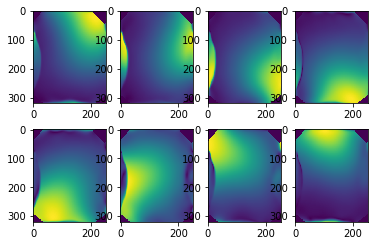

In [12]:
plot_maps(espirit_maps[:, :, :, 0])

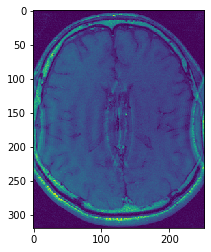

In [13]:
# SENSE

reco1 = sense_recon.squeeze()
plt.imshow(abs(reco1))

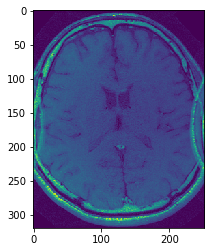

In [14]:
# ESPIRiT

reco2 = espirit_recon_rss.squeeze()
plt.imshow(abs(reco2))